<a href="https://colab.research.google.com/github/elderoliveira-01/Projeto-de-Transfer-Learning-em-Python/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Instala as fontes DejaVu para melhorar a exibição de texto.
!apt-get install -y fonts-dejavu


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-dejavu is already the newest version (2.37-2build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


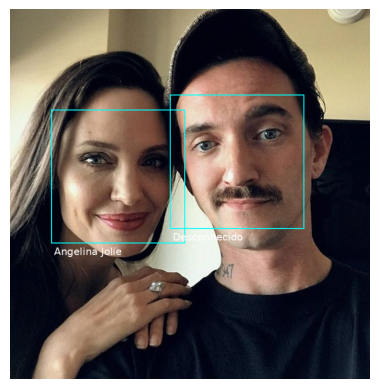

Imagem salva em: identified_output.png


In [51]:
import face_recognition
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Função para carregar e processar rostos conhecidos
def load_known_faces(image_paths, names):
    known_face_encodings = []
    known_face_names = []

    for image_path, name in zip(image_paths, names):
        image = face_recognition.load_image_file(image_path)
        face_encoding = face_recognition.face_encodings(image)

        if face_encoding:  # Se encontrar rostos na imagem
            known_face_encodings.append(face_encoding[0])  # Usando o primeiro rosto encontrado
            known_face_names.append(name)

    return known_face_encodings, known_face_names

# Função para identificar rostos na imagem desconhecida
def identify_faces_in_image(unknown_image_path, known_face_encodings, known_face_names, threshold=0.6):
    # Carregar a imagem desconhecida
    unknown_image = face_recognition.load_image_file(unknown_image_path)
    unknown_image_pil = Image.fromarray(unknown_image)
    draw = ImageDraw.Draw(unknown_image_pil)

    # Tentar carregar uma fonte TTF com tamanho personalizado
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"
    try:
        font = ImageFont.truetype(font_path, size=20)  # Fonte personalizada
    except IOError:
        print("Fonte TTF não encontrada. Usando fonte padrão.")
        font = ImageFont.load_default()

    # Detecção dos rostos na imagem desconhecida
    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Comparar com rostos conhecidos
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=threshold)

        name = "Desconhecido"  # Inicializar como "Desconhecido"

        # Se houver uma correspondência, obter o nome do rosto conhecido
        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]

        # Desenhar o retângulo e o nome
        draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255), width=2)
        draw.text((left + 6, bottom + 5), name, fill=(255, 255, 255), font=font)

    del draw
    return unknown_image_pil

# Embeddings dos rostos conhecidos (Angelina Jolie e Dwayne Johnson)
known_image_paths = ["imagem.jpg", "imagem2.jpg"]  # Caminhos das imagens conhecidas
known_names = ["Angelina Jolie", "Dwayne Johnson"]  # Nomes das pessoas

# Carregar os embeddings dos rostos conhecidos
known_face_encodings, known_face_names = load_known_faces(known_image_paths, known_names)

# Caminho da imagem desconhecida
unknown_image_path = "unknown.jpg"

# Identificar rostos na imagem desconhecida
identified_image = identify_faces_in_image(unknown_image_path, known_face_encodings, known_face_names, threshold=0.6)

# Salvar a imagem com os rostos identificados
output_image_path = "identified_output.png"
identified_image.save(output_image_path)

# Exibir a imagem com matplotlib
plt.imshow(identified_image)
plt.axis('off')  # Remover os eixos
plt.show()

print(f"Imagem salva em: {output_image_path}")
